In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-data/apple_products.csv


In [5]:
#dataframe summary info
df=pd.read_csv("/kaggle/input/apple-data/apple_products.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


In [6]:
#Top 5 rows of dataframe
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [7]:
#Total count of all column values
df.count()

Product Name           62
Product URL            62
Brand                  62
Sale Price             62
Mrp                    62
Discount Percentage    62
Number Of Ratings      62
Number Of Reviews      62
Upc                    62
Star Rating            62
Ram                    62
dtype: int64

In [8]:
df.columns


Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')

### Product Pricing and Discounts

In [9]:
#The average sale price of the products
avarage_sale_price = df["Sale Price"].mean()
avarage_sale_price

80073.8870967742

In [10]:
#The average sale price of the products for each prduct
avg_sale_price_for_each_product = df.groupby("Product Name")["Sale Price"].mean()
avg_sale_price_for_each_product

Product Name
APPLE iPhone 11 (Black, 128 GB)                                             54999.0
APPLE iPhone 11 (Black, 64 GB)                                              46999.0
APPLE iPhone 11 (Purple, 64 GB)                                             46999.0
APPLE iPhone 11 (Red, 128 GB)                                               54999.0
APPLE iPhone 11 (Red, 64 GB)                                                46999.0
                                                                             ...   
Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includes EarPods, Power Adapter)    41999.0
Apple iPhone XR (Black, 128 GB) (Includes EarPods, Power Adapter)           41999.0
Apple iPhone XR (Black, 64 GB) (Includes EarPods, Power Adapter)            39999.0
Apple iPhone XR (Coral, 128 GB) (Includes EarPods, Power Adapter)           41999.0
Apple iPhone XR (White, 128 GB) (Includes EarPods, Power Adapter)           41999.0
Name: Sale Price, Length: 62, dtype: float64

In [11]:
#How does the discount percentage correlate with the sale price?
correlation =df["Sale Price"].corr(df["Discount Percentage"])
correlation


-0.5696033014974268

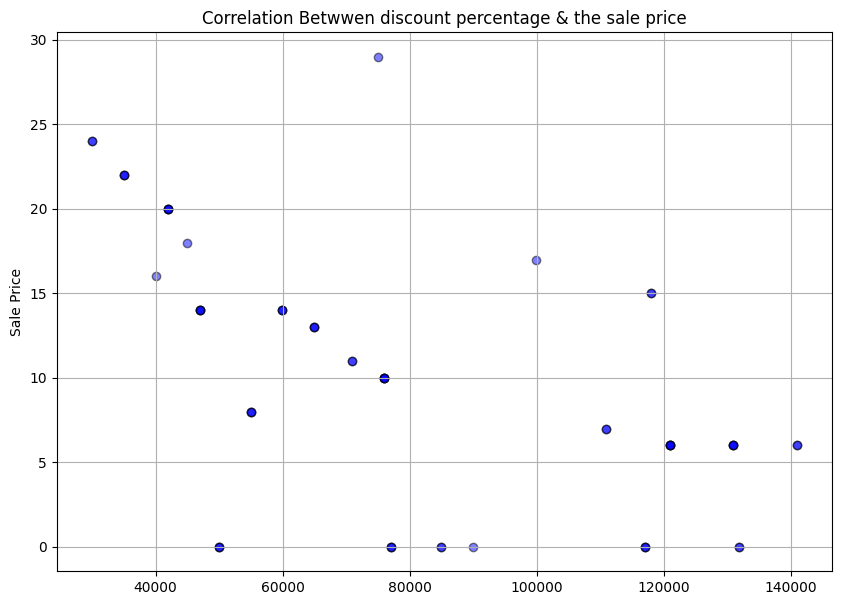

In [12]:
#Plot the correaltion using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Correlation Betwwen discount percentage & the sale price")
plt.scatter(df["Sale Price"],df["Discount Percentage"],alpha=0.5, c='blue', edgecolors='k')
plt.ylabel("Sale Price")
plt.xlabel=("Discount Percentage")
plt.grid(True)
plt.show()

####  Downward Trend: You should see a general downward trend in the scatter plot, reflecting the negative correlation. As discount percentages increase, the sale prices are expected to decrease.
#### Spread of Points: The data points might be spread out, showing that while there's a general trend, there are variations in the sale price for similar discount percentages.

### Ratings and Reviews


In [13]:
#The average star rating across all products?
avg_star_rating=df["Star Rating"].mean()
avg_star_rating

4.575806451612906

In [14]:
df.columns

Index(['Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')

In [15]:
#correlation between the number of ratings and the star rating of the products
corr =df["Star Rating"].corr(df["Number Of Ratings"])
corr

-0.22497743669932962

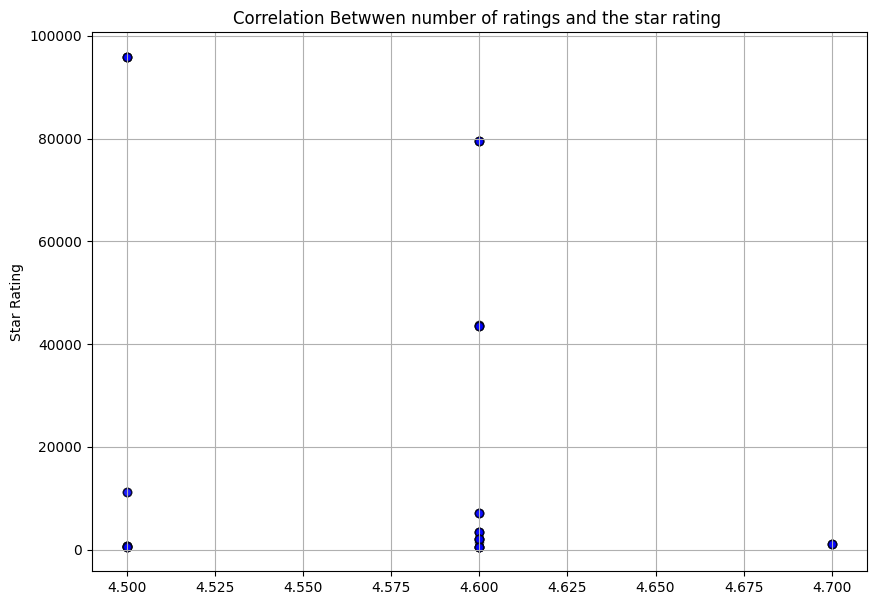

In [16]:
# correlation between the number of ratings and the star rating of the products

plt.figure(figsize=(10,7))
plt.title("Correlation Betwwen number of ratings and the star rating ")
plt.scatter(df["Star Rating"],df["Number Of Ratings"],alpha=0.5, c='blue', edgecolors='k')
plt.ylabel("Star Rating")
plt.xlabel=("Number Of Ratings")
plt.grid(True)
plt.show()

In [17]:
#The number of reviews relate to the star rating

correl = df['Number Of Reviews'].corr(df['Star Rating'])
#correl
print(f"Correlation coefficient between Number Of Reviews and Star Rating: {correl:.2f}")


Correlation coefficient between Number Of Reviews and Star Rating: -0.23


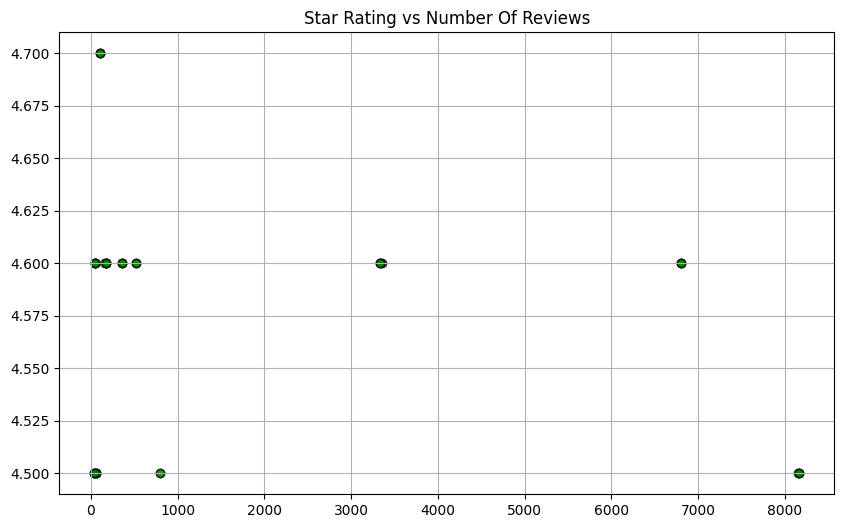

In [18]:
#Correlation coefficient between Number Of Reviews and Star Rating: -0.23

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Number Of Reviews'], df['Star Rating'], alpha=0.5, c='green', edgecolors='k')
plt.title('Star Rating vs Number Of Reviews')
#plt.xlabel("Number Of Reviews")
#plt.ylabel("Star Rating")
plt.grid(True)
plt.show()


#### Positive Correlation: If the correlation coefficient is positive, it suggests that as the number of reviews increases, the star rating tends to increase as well.

#### No Strong Trend: If the correlation is close to zero and the scatter plot is widely dispersed without any clear trend, there is no significant relationship between the number of reviews and the star rating.


In [19]:
df.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


### Statistical Distributions

In [20]:
#The statistical distributions (mean, median, mode) for sale price, MRP, and discount percentage

Stats={"metrics" : ["mean","mode","median"],
       "sale_Price" :[
           df["Sale Price"].mean(),
           df["Sale Price"].mode()[0],
           df["Sale Price"].median()],
       "Mrp" : [
            df["Mrp"].mean(),
            df["Mrp"].mode()[0],
           df["Mrp"].median()],
       "Discount Percentage": [
          df["Discount Percentage"].mean(),
            df["Discount Percentage"].mode()[0],
           df["Discount Percentage"].median()]
         }
Stats

{'metrics': ['mean', 'mode', 'median'],
 'sale_Price': [80073.8870967742, 75900, 75900.0],
 'Mrp': [88058.06451612903, 84900, 79900.0],
 'Discount Percentage': [9.951612903225806, 0, 10.0]}

In [21]:
stats_df=pd.DataFrame(Stats)
stats_df

,metrics,sale_Price,Mrp,Discount Percentage
0,mean,80073.887097,88058.064516,9.951613
1,mode,75900.000000,84900.000000,0.000000
2,median,75900.000000,79900.000000,10.000000


In [25]:
#The trends in star ratings and number of reviews for high-discount versus low-discount products

# Define the discount threshold
discount_threshold = df['Discount Percentage'].median()

# Create high-discount and low-discount categories
df['Discount Category'] = df['Discount Percentage'].apply(
    lambda x: 'High Discount' if x >= discount_threshold else 'Low Discount'
)

# Calculate average star rating and number of reviews for each category
summary_stats = df.groupby('Discount Category').agg({
    'Star Rating': ['mean', 'median', 'std'],
    'Number Of Reviews': ['mean', 'median', 'std']
}).reset_index()

# Flatten the MultiIndex columns for easier plotting
summary_stats.columns = ['Discount Category', 'Star Rating Mean', 'Star Rating Median', 'Star Rating Std', 
                         'Number Of Reviews Mean', 'Number Of Reviews Median', 'Number Of Reviews Std']

# Print summary statistics
print(summary_stats)




  Discount Category  Star Rating Mean  Star Rating Median  Star Rating Std  \
0     High Discount            4.5625                 4.6         0.049187   
1      Low Discount            4.5900                 4.6         0.066176   

   Number Of Reviews Mean  Number Of Reviews Median  Number Of Reviews Std  
0             3124.781250                     523.0            3425.185417  
1              514.366667                     101.0             988.214708  


#### Star Ratings: Compare the average and median star ratings for high-discount versus low-discount products. Trends might show whether higher discounts correlate with higher or lower ratings.
#### Number of Reviews: Compare the average and median number of reviews for both categories to understand if high-discount products tend to have more or fewer reviews.